<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Wasserstein_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wasserstein GAN**

논문 링크: https://arxiv.org/abs/1701.07875

먼저, WGAN 역시 기존 GAN의 문제점을 보완하기 위해 나온 것이므로 간단하게 GAN의 어떤 문제점을 focus했는지 알기 위해 간단하게 살펴보겠다. Unsupervised Learning은 데이터 x의 분포 P(x)를 직접 학습하겠다는 것이다.

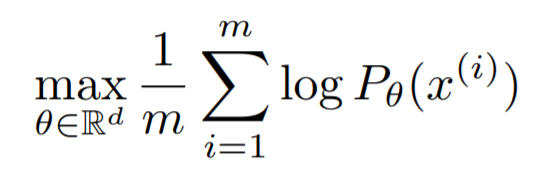

이를 위해 P(x)를 parameter θ에 대해 위의 식과 같이 표현하고, 이를 학습시킬 수 있다.

하지만 P(x)의 식을 직접 표현하는 것은 어렵기 때문에(이미 정답을 알고 있다는 의미가 된다.), GAN에서는 x를 결정하는 latent variable z의 분포를 가정하여 입력으로 대입하고, discriminator와 generator간의 관계를 학습시킴으로써 generator의 분포를 P(x)에 가깝게 학습시키고자 한다.

그러나 이때 discriminator와 generator간의 균형을 유지하며 학습하기 어렵고, 학습이 완료된 이후에도 mode dropping이 발생한다. 이런 문제가 발생하는 원인은 discriminator가 선생님 역할을 충분히 하지 못하여 모델이 최적점까지 학습되지 못한다.

Wasserstein GAN(WGAN)에서는 이런 문제들을 해결하기 위해 기존의 GAN과 비교하여
- discriminator 대신 새로 정의한 critic을 사용한다. discriminator는 가짜/진짜를 판별하기 위해 sigmoid를 사용하고, output은 가짜/진짜에 대하 예측 확률 값이다.
- 반면 critic은 EM(Earth Mover) distance로 부터 얻은 scalar 값을 이용한다.
- EM distance는 확률 분포 간의 거리를 측정하는 척도 중 하나인데, 그 동안 일반적으로 사용된 척도는 KL divergence이다. KL divergence는 매우 strict하게 거리를 측정하는 방법이라, continuous하지 않은 경우가 있어 학습하기 어렵다.

위와 같은 차이점들을 뒀다.

결과적으로, GAN의 discriminator보다 선생님 역할을 잘 수행할 수 있는 critic을 사용함으로써 gradient를 잘 전달시키고, critic과 generator를 최적점까지 학습할 수 있다는 것이다.

- training 시 discriminator와 generator간의 balance를 주의깊게 살피고 있지 않아도 된다.
- GAN에서 일반적을 발생되는 문제인 mode dropping을 해결한다.

덕분에 위와 같은 이점을 얻는다.

## **Different Distances**



### **1. Total Variation (TV) distance**

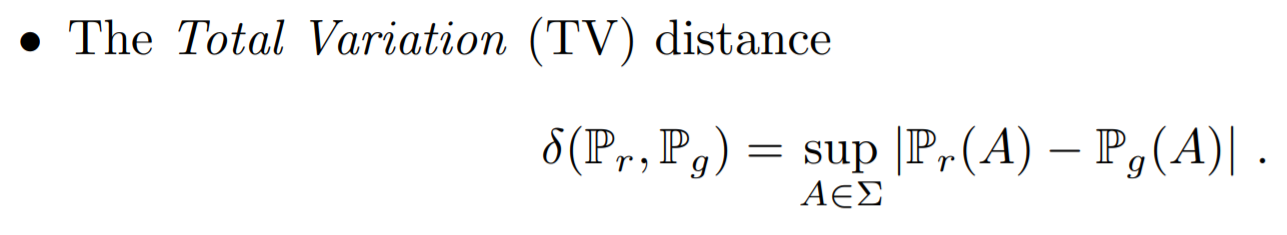

두 확률 분포의 측정값이 벌어질 수 있는 가장 큰 값이다. 

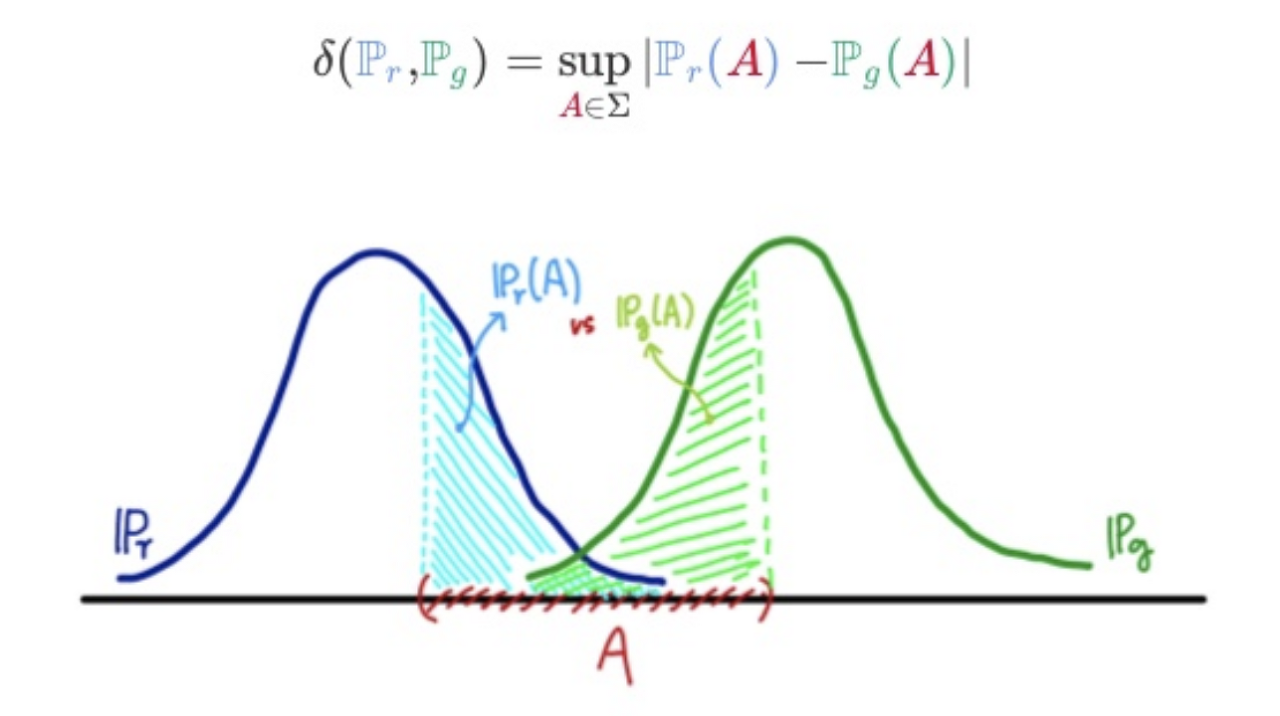

위 그림을 참고하면 쉽게 이해할 수 있는데, 빨간색 A 영역안에 있는 A들을 대입할때, Pr(A)와 Pg(A)의 값의 차 중 가장 큰 것을 의미한다.

### **2. Kullback-Leibler (KL) divergence**

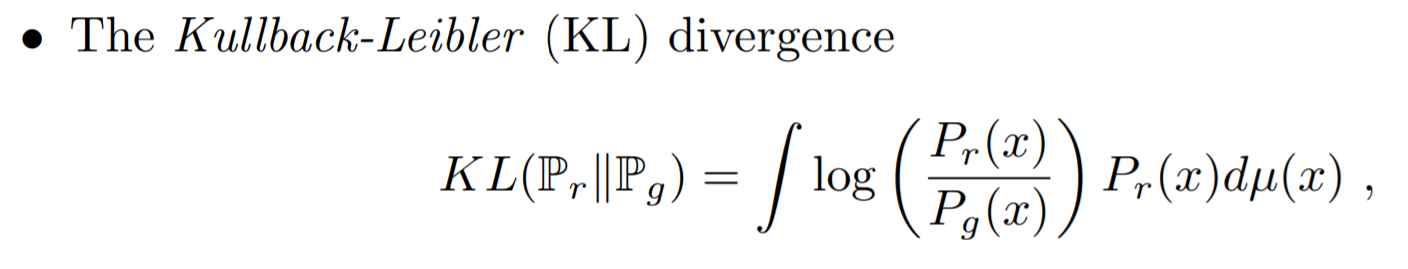

(링크: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb)

### **3. The Jensen-Shannon (JS) divergence**

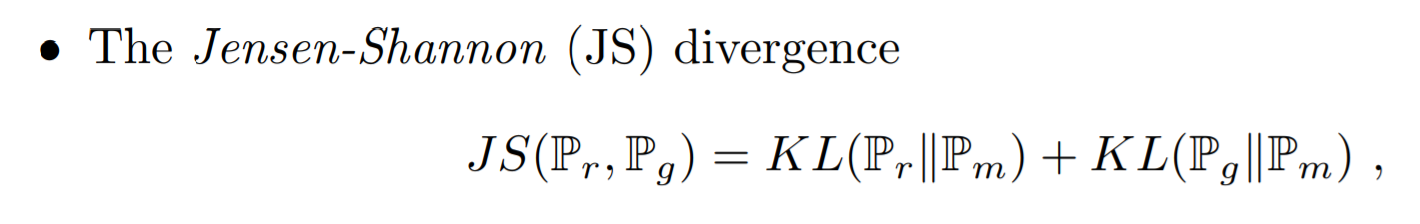

(링크: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb)

### **4. Earth-Mover (EM) distance or Wasserstein-1**

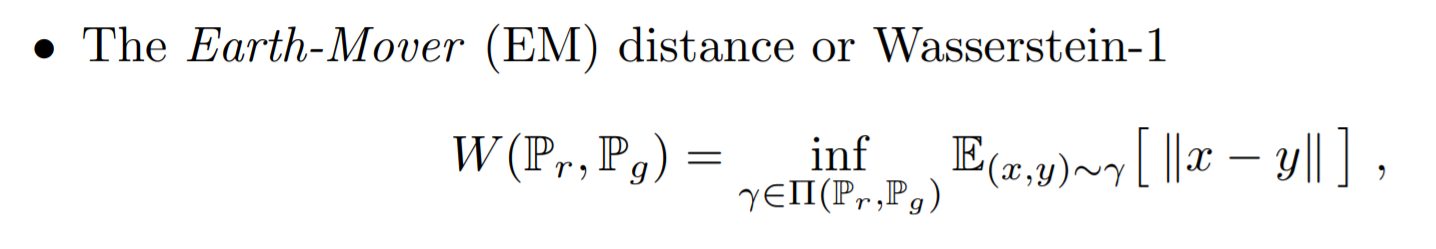

두 확률 분포의 결합확률분포 Π(Pr, Pg)중에서 d(X,Y) (x와 y의 거리)의 기댓값을 가장 작게 추정한 값이다.

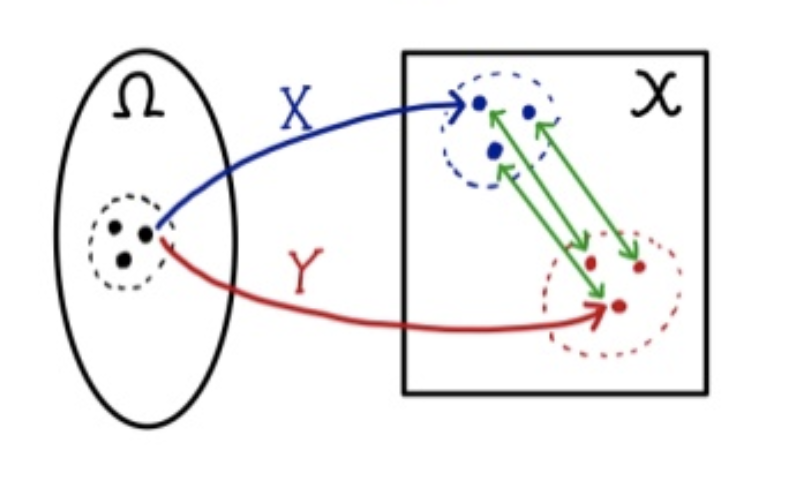

위 그림을 참고하면 쉽게 이해할 수 있다 그림에서 각각 파란색 원이 X의 분포, 빨간색 원이 Y의 분포, 𝛘가 결합 확률 분포를 의미한다. 그리고 초록색 선의 길이가 ||x-y||를 의미하는데, 즉 초록색 선 길이들의 기댓값을 가장 작게 추정한 값이다.

Distance 함수들을 살펴봤는데, 논문의 저자는 EM distance의 타당성을 주장했다.

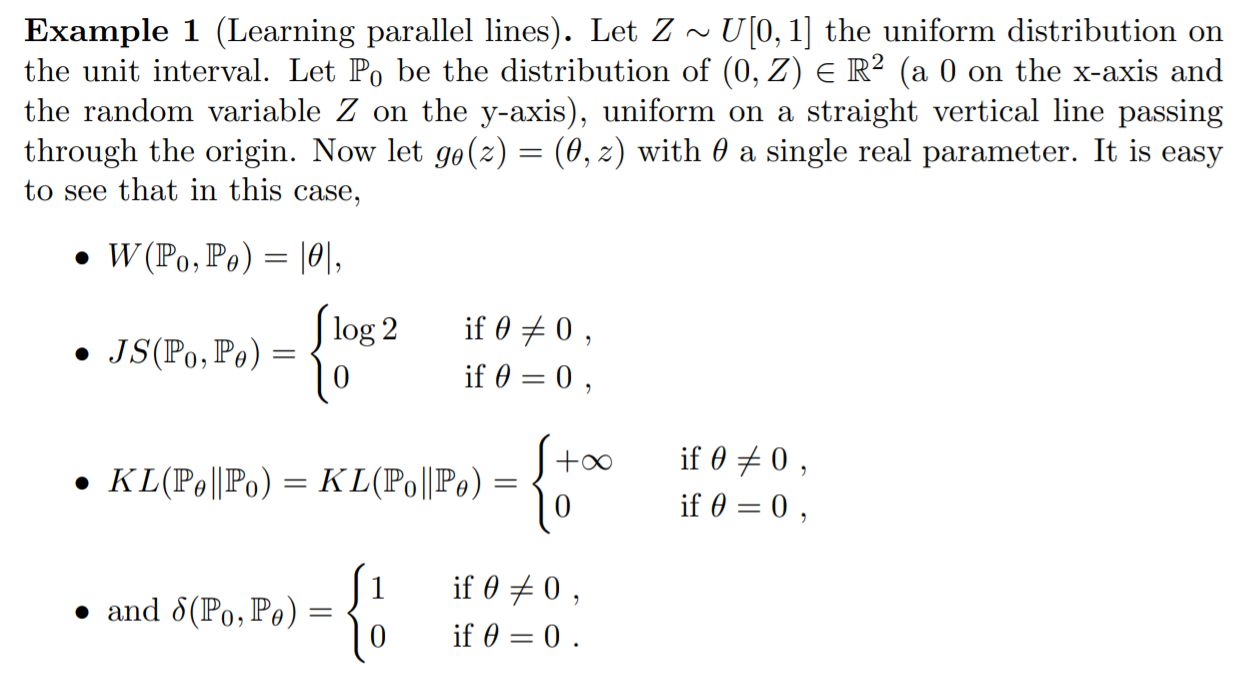

위의 Example 1은 임의의 distribution P0과 Pθ를 정의하고, 이들 간의 확률 거리를 구한 것이다. 결과를 보면 알 수 있듯이 Wasserstein(=EM distance)의 경우는 θ에 관계없이 일정한 수식을 가진다. (다른 거리의 경우 θ에 따라 거리가 달라지는 것 뿐만 아니라 그 값이 상수 또는 무한대이다.)

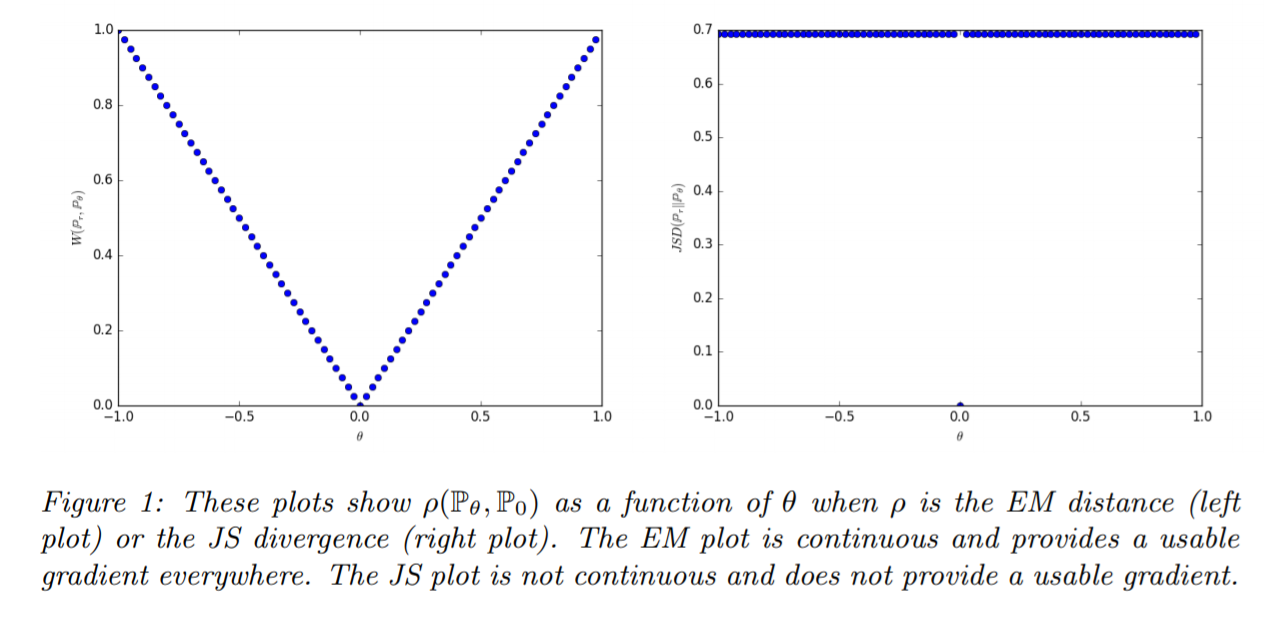

위의 그림 Figure 1은 위의 Example 1에서 나온 결과를 그림으로 보여준 것이다. 즉, 정리하자면 **KL/JS divergence나 TV의 경우는 두 분포가 서로 겹치는 경우에는 0이지만, 겹치지 않는 경우는 무한대 또는 상수와 같이 극단적인 값을 나타낸다.** 이는 discriminator와 generator가 분포를 학습할 때 위 3가지 distance를 기반으로 학습시 어려움을 겪을 것이라는 것을 알게 해준다. 이와 대조적으로, **Wassersetein(=EM distance)의 경우는 분포가 겹치던 안겹치던 |θ|이 유지되므로, 학습시 사용하기 쉽다.**

## **EM distance**

EM distance를 사용하기 위해선 제약 조건이 붙는다. 바로 미분이 가능해야한다.

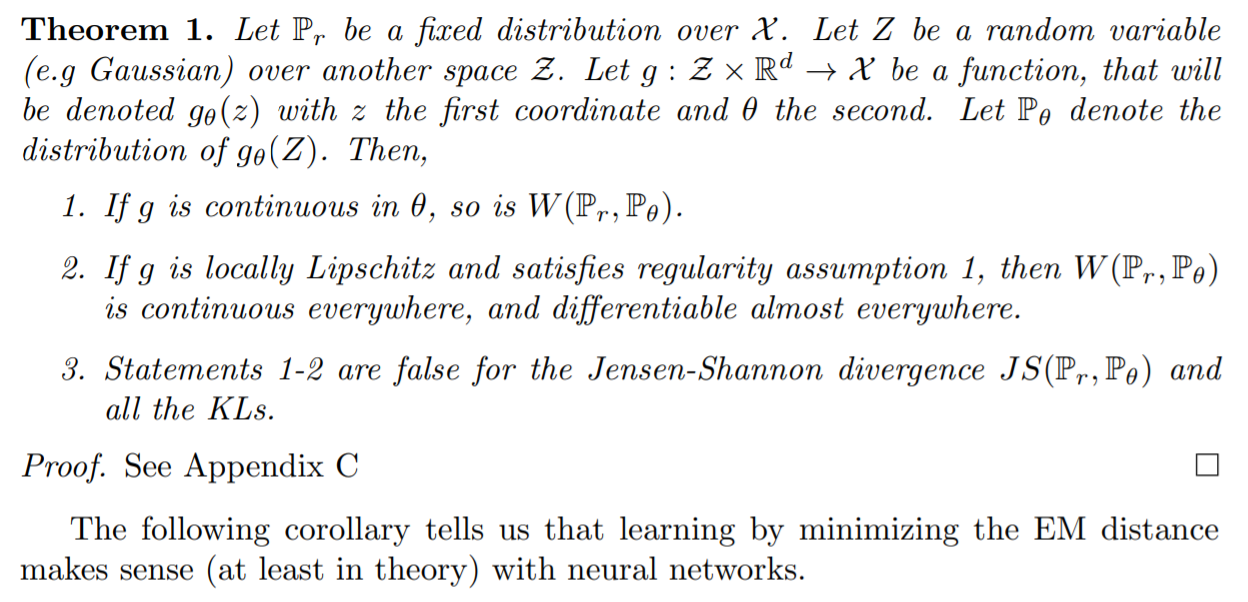

위의 정리 Theorem 1을 보겠다. Pr은 학습하고자 하는 목표 distribution이며, Pθ는 학습시키고 있는 현재의 distribution이다. z는 latent variable space이며, function g는 z를 x로 mapping하는 함수다. 이때 gθ(z)의 distribution이 Pθ가 된다.

1. g가 θ에 대해 연속한다면, Pr과 Pθ의 EM distance 또한 연속한다.
2. g가 Lipschitz 조건을 만족하면, Pr과 Pθ의 EM distance 또한 연속한다.

(**Lipshitz 조건이란? 두 점 상의 거리를 일정 비 이상으로 증가시키지 않는 함수**)